In [1]:
from pathlib import Path
#OS command or directory
import os
# data pre processing
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
# Ml / DL Library
import tensorflow as tf
# keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
# for trian test and validation
from sklearn.model_selection import train_test_split
from google.colab import files

In [2]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
os.environ['KAGGLE_CONFICT_DIR']='/content'

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! kaggle datasets download -d nbroad/fluorescent-neuronal-cells

100% 393M/395M [00:03<00:00, 133MB/s]
100% 395M/395M [00:03<00:00, 105MB/s]


In [7]:
! unzip fluorescent-neuronal-cells.zip

Archive:  fluorescent-neuronal-cells.zip
  inflating: README.md               
  inflating: all_images/LICENSE.txt  
  inflating: all_images/images/37_y.png  
  inflating: all_images/images/38_y.png  
  inflating: all_images/images/39_y.png  
  inflating: all_images/images/MAR38S1C3R1_DML_20_o.png  
  inflating: all_images/images/MAR38S1C3R1_DMR_20_o.png  
  inflating: all_images/images/MAR38S1C3R1_LHR_20_o.png  
  inflating: all_images/images/MAR39S2C2R2_DML_200x_o.png  
  inflating: all_images/images/MAR39S2C2R2_DMR_200x_o.png  
  inflating: all_images/images/MAR52S2C1R3_LHL_20_o.png  
  inflating: all_images/images/MAR55S1C5R3_DMR_20_o.png  
  inflating: all_images/images/MAR55S3C2R2_VLPAGL_20_o.png  
  inflating: all_images/images/MAR55S3C2R2_VLPAGR_20_o.png  
  inflating: all_images/images/Mar19bS1C1R2_VLPAGr_200x_y.png  
  inflating: all_images/images/Mar19bS1C1R3_VLPAGl_200x_y.png  
  inflating: all_images/images/Mar19bS1C1R3_VLPAGr_200x_y.png  
  inflating: all_images/images/Ma

In [8]:
img_path=Path(r'/content/all_images/images')
mask_path=Path(r'/content/all_masks/masks')

In [9]:
img_path_file=list(img_path.glob(r'**/*.png'))
mask_path_file=list(mask_path.glob(r'**/*.png'))

In [10]:
img_path_file = pd.Series(img_path_file).astype(str)
mask_path_file = pd.Series(mask_path_file).astype(str)

In [11]:
df_ = pd.concat([img_path_file, mask_path_file], axis=1)
df_.columns = ['image', 'mask']
df_.head()

,image,mask
0,/content/all_images/images/Mar26bS1C1R4_VLPAGr...,/content/all_masks/masks/Mar26bS1C1R4_VLPAGr_2...
1,/content/all_images/images/Mar20bS1C4R1_LHr_20...,/content/all_masks/masks/Mar20bS1C4R1_LHr_200x...
2,/content/all_images/images/Mar24bS1C2R1_LHl_20...,/content/all_masks/masks/Mar24bS1C2R1_LHl_200x...
3,/content/all_images/images/Mar24bS1C2R3_DMr_20...,/content/all_masks/masks/Mar24bS1C2R3_DMr_200x...
4,/content/all_images/images/Mar19bS2C1R1_LHl_20...,/content/all_masks/masks/Mar19bS2C1R1_LHl_200x...


In [12]:
df_.value_counts()

image                                                      mask                                                   
/content/all_images/images/37_y.png                        /content/all_masks/masks/37_y.png                          1
/content/all_images/images/Mar23bS1C6R3_LHr_200x_y.png     /content/all_masks/masks/Mar23bS1C6R3_LHr_200x_y.png       1
/content/all_images/images/Mar24bS1C1R1_LHr_200x_y.png     /content/all_masks/masks/Mar24bS1C1R1_LHr_200x_y.png       1
/content/all_images/images/Mar24bS1C1R1_LHl_200x_y.png     /content/all_masks/masks/Mar24bS1C1R1_LHl_200x_y.png       1
/content/all_images/images/Mar24bS1C1R1_DMr_200x_y.png     /content/all_masks/masks/Mar24bS1C1R1_DMr_200x_y.png       1
                                                                                                                     ..
/content/all_images/images/Mar21bS1C1R3_VLPAGl_200x_y.png  /content/all_masks/masks/Mar21bS1C1R3_VLPAGl_200x_y.png    1
/content/all_images/images/Mar21bS1C1R3_VLPAG

In [13]:
type(df_)

pandas.core.frame.DataFrame

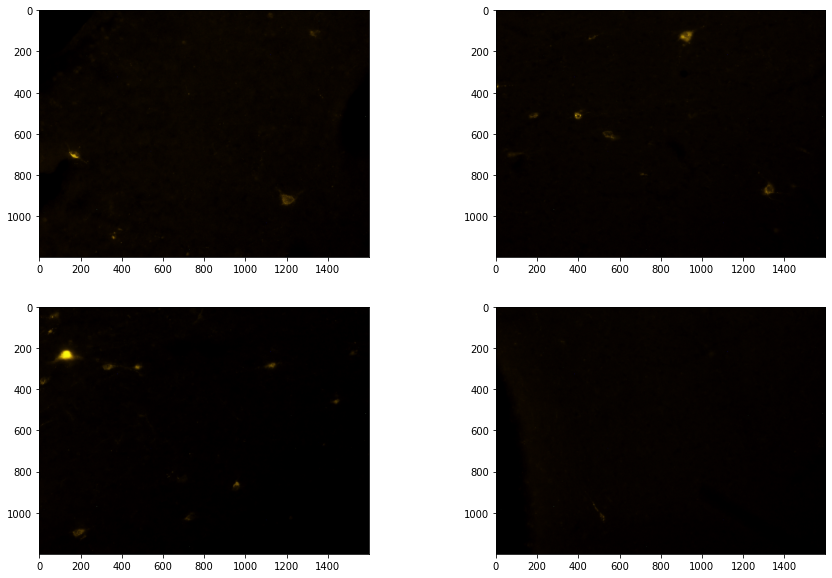

TypeError: ignored

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(df_.image[i]))
plt.show()

for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(df_.mask[i]))
plt.show()

In [14]:
X_train,X_test,y_train,y_test= train_test_split(df_['image'],df_['mask'],test_size=0.2,random_state=42)
print(X_train.value_counts())
print(y_train.value_counts())
print(X_test.value_counts())
print(y_test.value_counts())

/content/all_images/images/Mar20bS1C4R1_DMl_200x_y.png       1
/content/all_images/images/Mar20bS2C1R2_LHl_200x_y.png       1
/content/all_images/images/Mar24bS2C4R3_DMl_200x_y.png       1
/content/all_images/images/Mar19bS1C4R1_VLPAGr_200x_y.png    1
/content/all_images/images/Mar27bS1C2R3_LHr_200x_y.png       1
                                                            ..
/content/all_images/images/Mar22bS1C5R1_LHl_200x_y.png       1
/content/all_images/images/Mar20bS2C3R1_LHr_200x_y.png       1
/content/all_images/images/Mar19bS1C1R3_VLPAGr_200x_y.png    1
/content/all_images/images/Mar24bS1C2R3_DMl_200x_y.png       1
/content/all_images/images/Mar19bS1C5R2_DMr_200x_y.png       1
Name: image, Length: 226, dtype: int64
/content/all_masks/masks/Mar20bS1C4R1_DMl_200x_y.png       1
/content/all_masks/masks/Mar20bS2C1R2_LHl_200x_y.png       1
/content/all_masks/masks/Mar24bS2C4R3_DMl_200x_y.png       1
/content/all_masks/masks/Mar19bS1C4R1_VLPAGr_200x_y.png    1
/content/all_masks/masks

In [15]:
X_train

202    /content/all_images/images/Mar20bS1C4R1_DMl_20...
25     /content/all_images/images/Mar27bS1C2R1_LHr_20...
86     /content/all_images/images/Mar19bS1C5R1_DMl_20...
140    /content/all_images/images/Mar24bS2C4R3_DMr_20...
179    /content/all_images/images/Mar26bS2C2R3_LHr_20...
                             ...                        
188    /content/all_images/images/Mar23bS1C2R3_VLPAGr...
71     /content/all_images/images/Mar26bS2C2R2_DMl_20...
106    /content/all_images/images/Mar21bS2C2R3_LHr_20...
270    /content/all_images/images/Mar19bS1C5R1_DMr_20...
102    /content/all_images/images/Mar19bS1C5R2_DMr_20...
Name: image, Length: 226, dtype: object

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


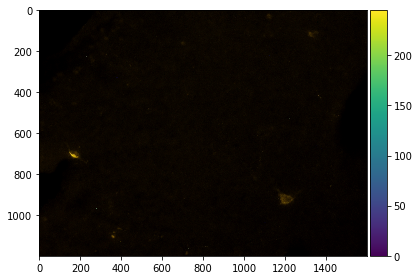

In [18]:
imshow(X_train[0])

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


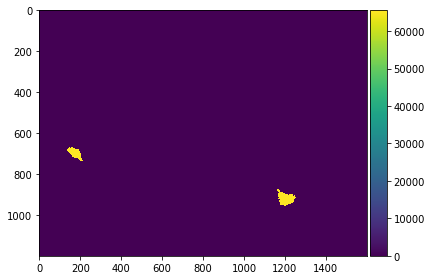

In [19]:
imshow(y_train[0])

In [17]:
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize

Convert Dataframe into np Arrays:

In [59]:
X_t=np.array(X_train)
Y_t=np.array(y_train)
x_t=np.array(X_test)
y_t=np.array(y_test)

In [40]:
def get_image_data(path):
 xtt=np.zeros((len(path),256,256,3),dtype=np.uint8)
 for i in range(len(path)):
  img = imread(path[i])  
  img = resize(img, (256, 256), mode='constant', preserve_range=True)
  xtt[i] = img
 return xtt

def get_mask_data(path):
 ytt=np.zeros((len(path),256,256,1),dtype=np.uint8)
 for i in range(len(path)):
  img = imread(path[i])  
  img = np.expand_dims(resize(img, (256, 256), mode='constant', preserve_range=True),axis=-1)
  ytt[i] = img
 return ytt

In [60]:
X_t=get_image_data(X_t)
Y_t=get_mask_data(Y_t)
x_t=get_image_data(x_t)
y_t=get_mask_data(y_t)

In [61]:
print(X_t.shape)
print(Y_t.shape)
print(x_t.shape)
print(y_t.shape)

(226, 256, 256, 3)
(226, 256, 256, 1)
(57, 256, 256, 3)
(57, 256, 256, 1)


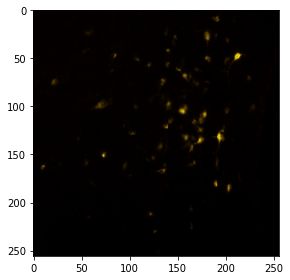

In [24]:
imshow(X_t[0])

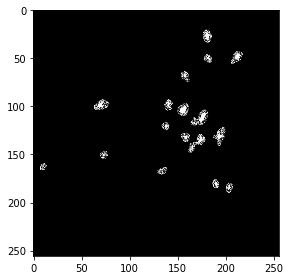

In [25]:
imshow(np.squeeze(Y_t[0]))

UNet Model:

In [26]:
from tensorflow.keras import layers

Keras Model:

In [69]:
def get_model():
  
    inputs = tf.keras.layers.Input((256, 256, 3))
    #x = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)
    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    #x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        #x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        #x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        #x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        #x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(1, 1, activation="sigmoid", padding="same")(x)

    # Define the model
    model = tf.keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
tf.keras.backend.clear_session()

# Build model
img_size = (256, 256, 3)
model = get_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 128, 128, 32  0           ['conv2d[0][0]']                 
                                )                                                             

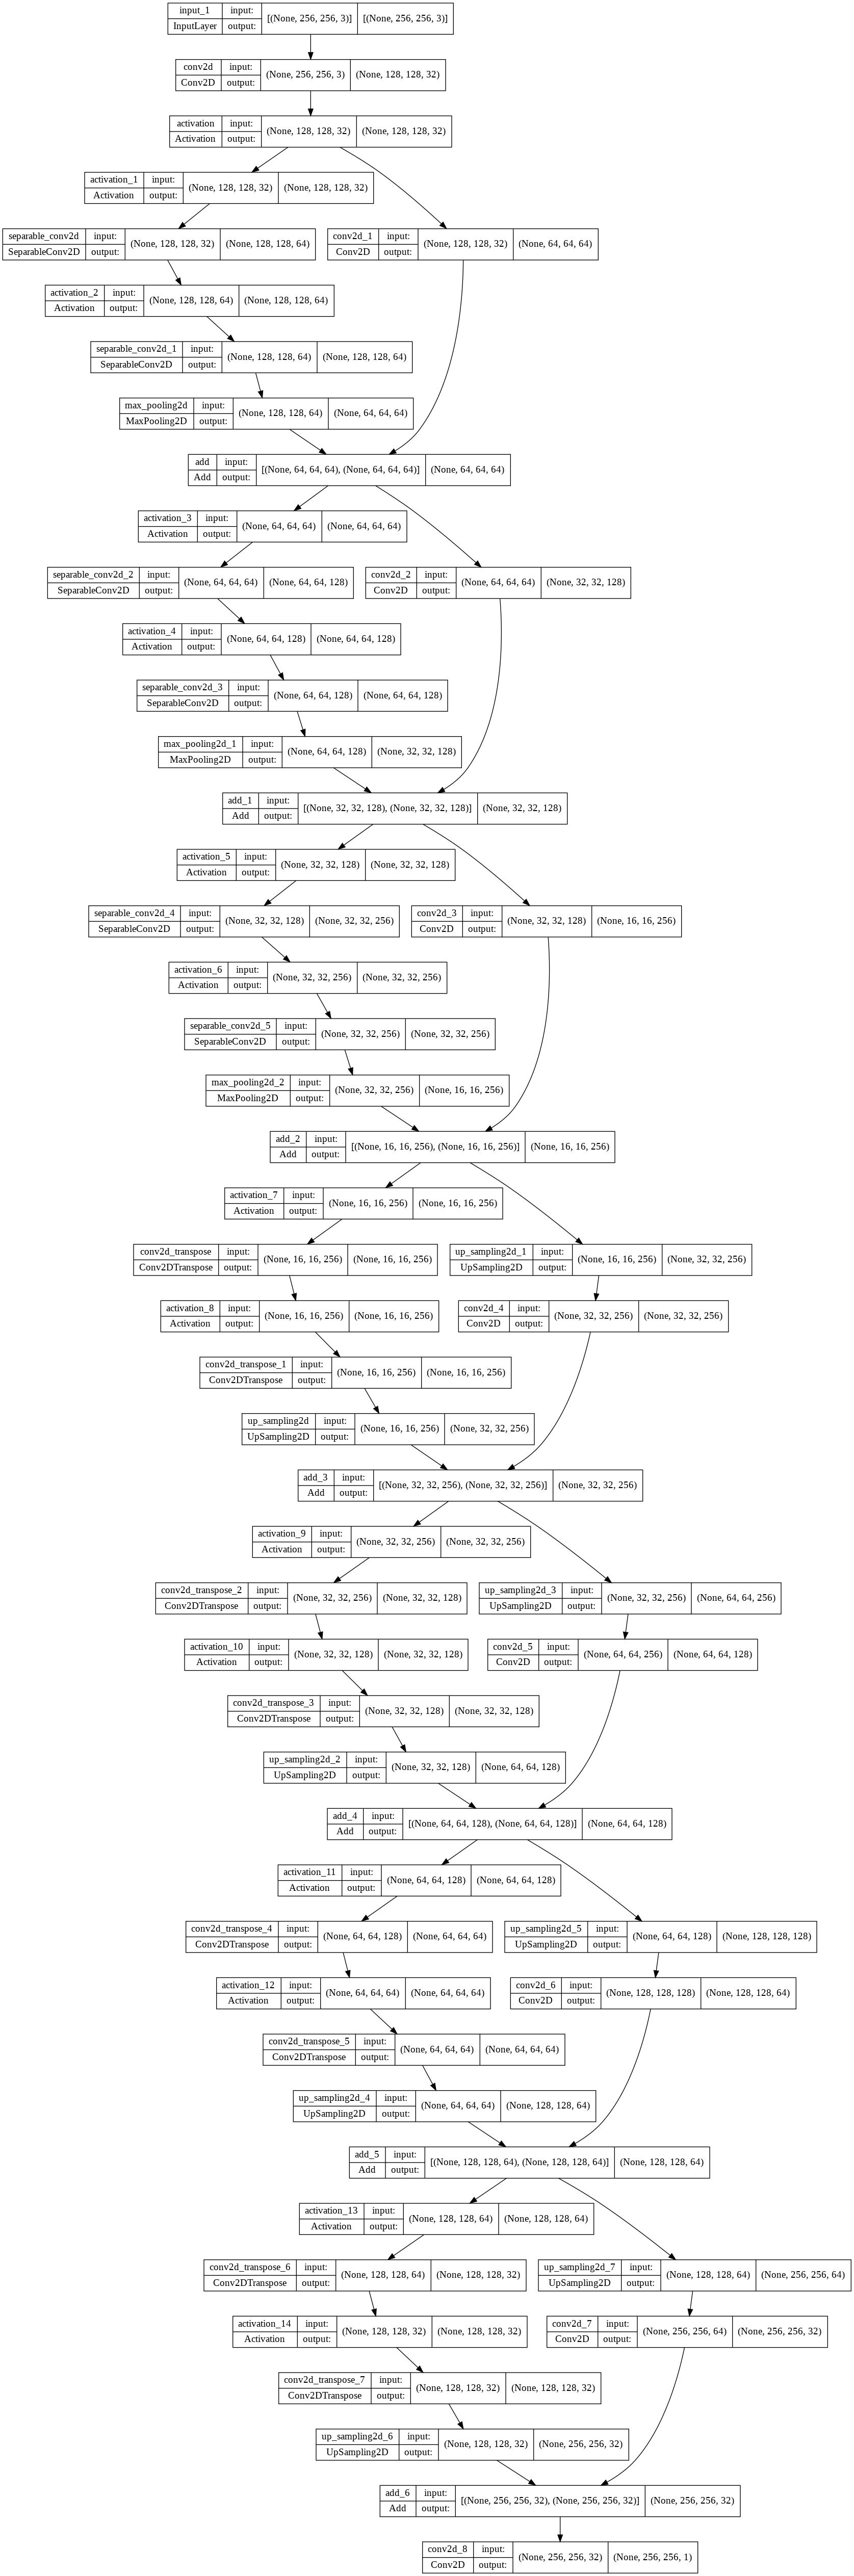

In [127]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [62]:
X_t=np.array(X_t,np.float32)/255

In [63]:
Y_t=np.array(Y_t,np.float32)/255

In [70]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')]

results = model.fit(X_t, Y_t, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
13/13 [==============================] - 10s 501ms/step - loss: 0.1517 - accuracy: 0.9800 - val_loss: 0.0425 - val_accuracy: 0.9887
Epoch 2/25
13/13 [==============================] - 3s 229ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0350 - val_accuracy: 0.9887
Epoch 3/25
13/13 [==============================] - 3s 232ms/step - loss: 0.0360 - accuracy: 0.9876 - val_loss: 0.0329 - val_accuracy: 0.9886
Epoch 4/25
13/13 [==============================] - 3s 230ms/step - loss: 0.0349 - accuracy: 0.9876 - val_loss: 0.0322 - val_accuracy: 0.9886
Epoch 5/25
13/13 [==============================] - 3s 233ms/step - loss: 0.0332 - accuracy: 0.9876 - val_loss: 0.0306 - val_accuracy: 0.9886
Epoch 6/25
13/13 [==============================] - 3s 232ms/step - loss: 0.0303 - accuracy: 0.9876 - val_loss: 0.0274 - val_accuracy: 0.9887
Epoch 7/25
13/13 [==============================] - 3s 233ms/step - loss: 0.0256 - accuracy: 0.9874 - val_loss: 0.0232 - val_accuracy: 0.9887
Epoch

In [64]:
x_t=np.array(x_t,np.float32)/255
y_t=np.array(y_t,np.float32)/255

2/2 [==============================] - 0s 94ms/step


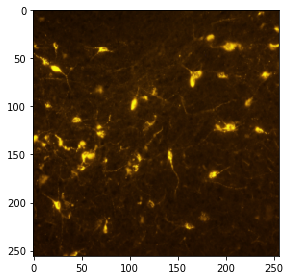

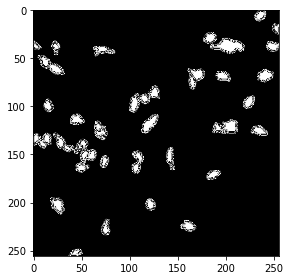

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


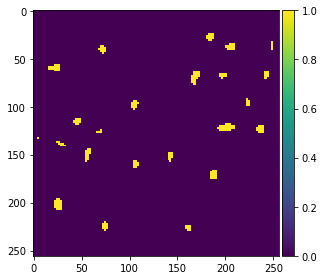

In [76]:
preds_train = model.predict(X_t[:int(X_t.shape[0])], verbose=1)
preds_test = model.predict(x_t, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
imshow(x_t[33])
plt.show()
imshow(np.squeeze(y_t[33]))
plt.show()
imshow(np.squeeze(preds_test_t[33]))
plt.show()

In [77]:
preds_test_t

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


My Model:

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


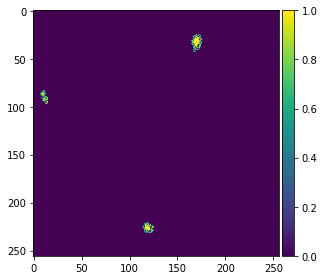

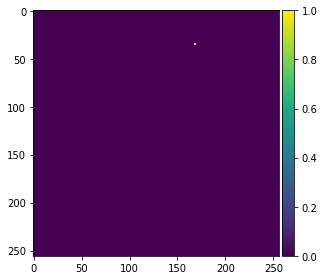

In [139]:
imshow(np.squeeze(y_t[5]))
plt.show()
imshow(np.squeeze(preds_test_t[5]))
plt.show()

In [141]:
def get_model():
  
    inputs = tf.keras.layers.Input((256, 256, 3))
    x=inputs
    residual=[]
    i=0
    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filter in [64, 128, 256,512,1024]:
      x = tf.keras.layers.Conv2D(filter, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
      x = tf.keras.layers.Dropout(0.1)(x)
      x = tf.keras.layers.Conv2D(filter, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
      x = tf.keras.layers.MaxPooling2D((2, 2))(x)
            # Project residual
      residual.append(x)
      i=i+1
      #residual = layers.Conv2D(filters, 1, strides=2, padding="same")(previous_block_activation)
      #x = layers.add([x, residual])  # Add back residual
      previous_block_activation = x  # Set aside next residual

        ### [Second half of the network: upsampling inputs] ###
    res=np.array(residual)
    i=i-2
    for filter in [512,256, 128, 64]:
      x= tf.keras.layers.Conv2DTranspose(filter, (2, 2), strides=(2, 2), padding='same')(x)
      x = tf.keras.layers.concatenate([x, res[i]])
      i=i-1
      x = tf.keras.layers.Conv2D(filter, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
      x = tf.keras.layers.Dropout(0.2)(x)
      x = tf.keras.layers.Conv2D(filter, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)

            # Project residual
      #residual = layers.UpSampling2D(2)(previous_block_activation)
      #residual = layers.Conv2D(filters, 1, padding="same")(residual)
      #x = layers.add([x, residual])  # Add back residual
      previous_block_activation = x  # Set aside next residual
      outputs = layers.Conv2D(1, 1, activation="sigmoid", padding="same")(x)

    # Define the model
    model = tf.keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
tf.keras.backend.clear_session()

# Build model
model2 = get_model()
model2.summary()


TypeError: ignored

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')]

results = model2.fit(X_t, Y_t, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

 other UNet Model:

In [46]:
def unet():
    inputs = tf.keras.layers.Input((256, 256, 3))
    conv1 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = tf.keras.layers.Dropout(0.5)(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = tf.keras.layers.Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = tf.keras.layers.Dropout(0.5)(conv5)

    up6 = tf.keras.layers.Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(tf.keras.layers.UpSampling2D(size = (2,2))(drop5))
    merge6 = tf.keras.layers.concatenate([drop4,up6], axis = 3)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = tf.keras.layers.Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(tf.keras.layers.UpSampling2D(size = (2,2))(conv6))
    merge7 = tf.keras.layers.concatenate([conv3,up7], axis = 3)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = tf.keras.layers.Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(tf.keras.layers.UpSampling2D(size = (2,2))(conv7))
    merge8 = tf.keras.layers.concatenate([conv2,up8], axis = 3)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = tf.keras.layers.Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(tf.keras.layers.UpSampling2D(size = (2,2))(conv8))
    merge9 = tf.keras.layers.concatenate([conv1,up9], axis = 3)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = tf.keras.layers.Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(conv9)
 
    model3 = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model3


# Free up RAM in case the model definition cells were run multiple times
tf.keras.backend.clear_session()

# Build model
model3 = unet()
model3.summary()
    

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

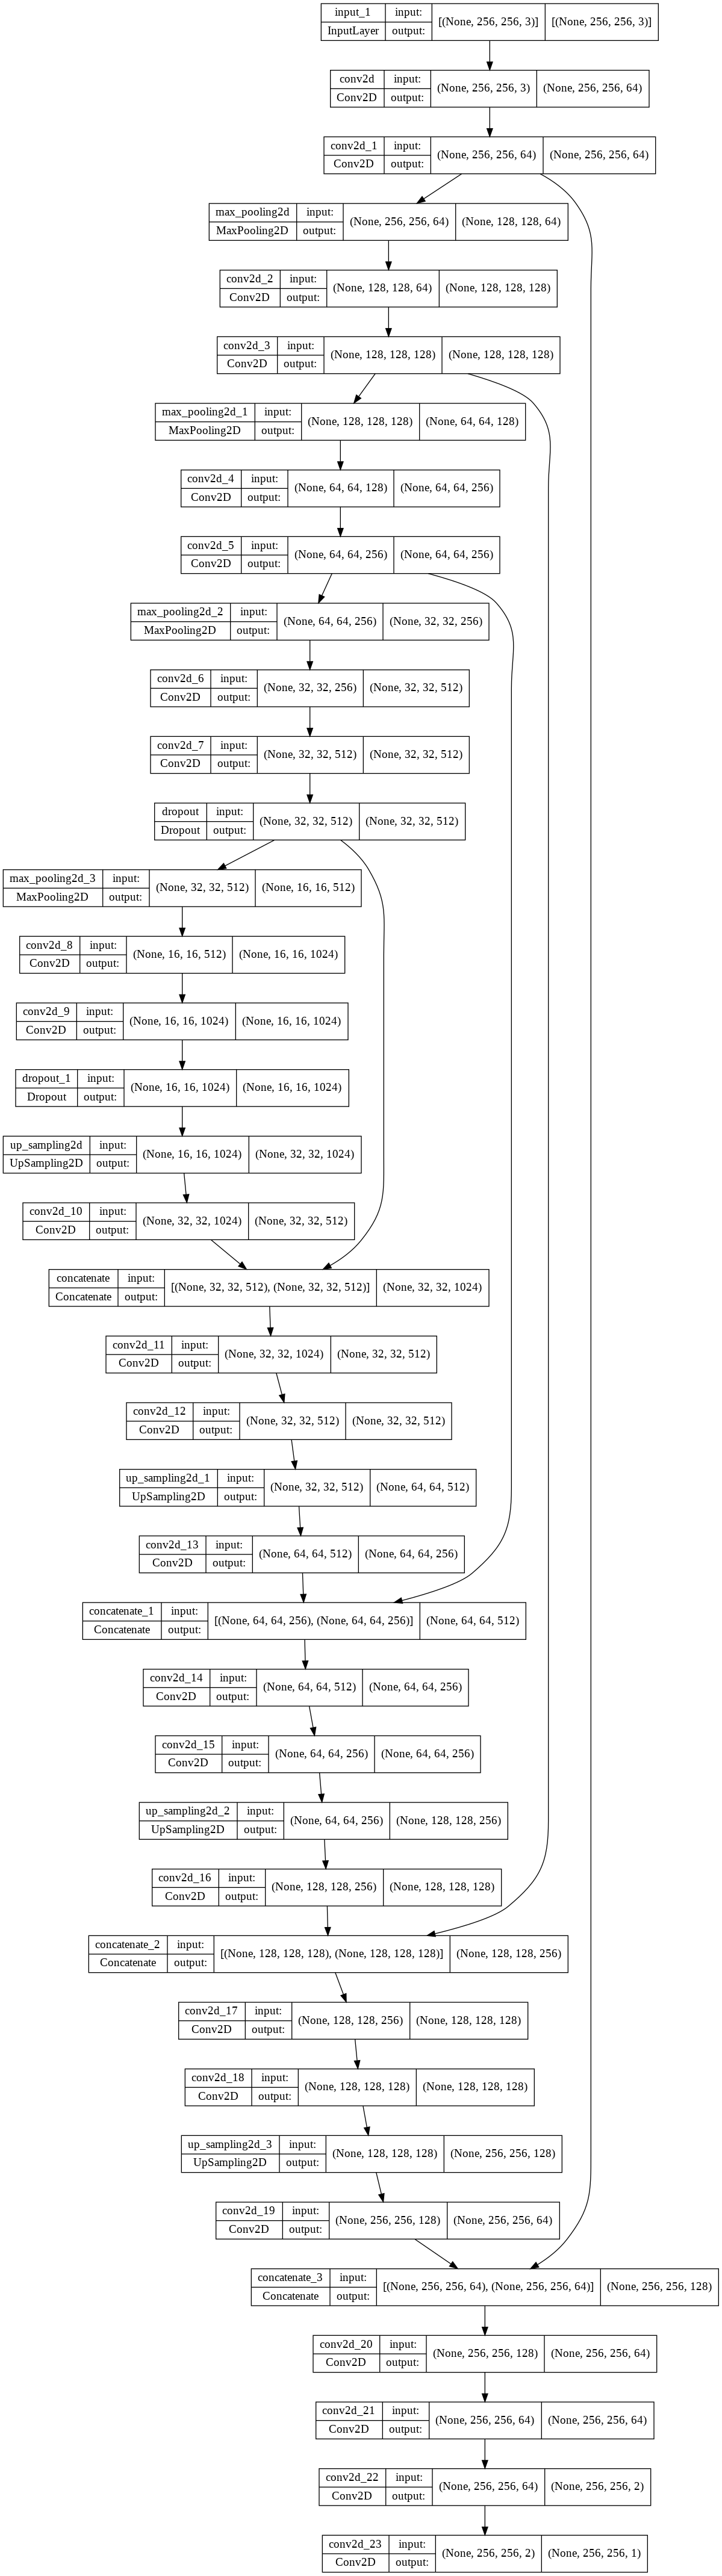

In [28]:
tf.keras.utils.plot_model(model3,show_shapes=True)

In [47]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')]

results = model3.fit(X_t, Y_t, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
13/13 [==============================] - 14s 1s/step - loss: 4.5656 - accuracy: 0.9876 - val_loss: 0.1109 - val_accuracy: 0.9887
Epoch 2/25
13/13 [==============================] - 13s 978ms/step - loss: 0.0627 - accuracy: 0.9876 - val_loss: 0.0274 - val_accuracy: 0.9887
Epoch 3/25
13/13 [==============================] - 13s 988ms/step - loss: 0.0262 - accuracy: 0.9876 - val_loss: 0.0184 - val_accuracy: 0.9887
Epoch 4/25
13/13 [==============================] - 13s 996ms/step - loss: 0.0165 - accuracy: 0.9876 - val_loss: 0.0152 - val_accuracy: 0.9887
Epoch 5/25
13/13 [==============================] - 13s 1s/step - loss: 0.0162 - accuracy: 0.9876 - val_loss: 0.0136 - val_accuracy: 0.9887
Epoch 6/25
13/13 [==============================] - 13s 1s/step - loss: 0.0154 - accuracy: 0.9876 - val_loss: 0.0133 - val_accuracy: 0.9887
Epoch 7/25
13/13 [==============================] - 13s 1s/step - loss: 0.0146 - accuracy: 0.9876 - val_loss: 0.0129 - val_accuracy: 0.9887
Epoch 8/25


In [65]:
x_t

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [85]:
preds_train = model3.predict(X_t, verbose=1)
preds_test = model3.predict(x_t, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

2/2 [==============================] - 1s 594ms/step


In [68]:
preds_test_t

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


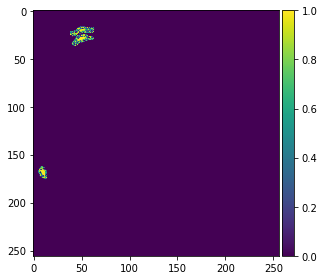

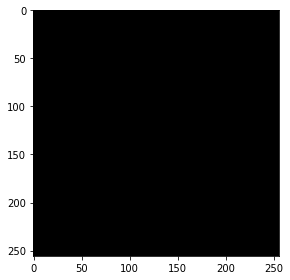

In [90]:
imshow(np.squeeze(y_t[22]))
plt.show()
imshow(np.squeeze(preds_test_t[22]))
plt.show()